In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
savedir = Path("output")

In [4]:
srses = {}
for i in savedir.glob("*.csv"):
    num_ids = int(i.stem.split("-")[1])
    srses[num_ids] = pd.read_csv(i, index_col=0, squeeze=True)

In [5]:
df = pd.DataFrame(srses)

In [6]:
srs = df.mean(axis="rows")

In [7]:
srs = srs.sort_index()

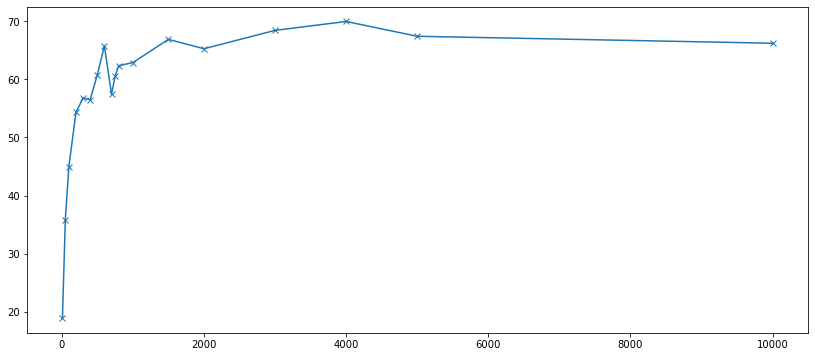

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(srs, marker="x")

Need to see error bars to get a better picture.

In [9]:
# Reshape into a tidy df
df.head()

,400,10000,10,4000,2000,3000,600,300,500,50,1000,100,5000,800,700,1500,750,200
0,48.06,37.10,16.69,74.29,53.14,62.88,54.61,46.96,70.55,40.17,73.41,46.23,47.17,71.74,57.32,70.85,60.37,55.11
1,66.64,53.20,16.14,75.20,59.52,64.59,76.26,55.62,71.01,36.05,64.70,48.40,63.49,59.18,58.64,68.35,61.60,56.46
2,51.66,70.76,18.70,72.03,78.35,53.79,74.19,57.38,49.15,32.77,55.81,46.68,57.07,49.55,62.00,75.42,69.88,53.09
3,50.74,74.30,20.64,48.67,46.93,71.70,72.13,59.64,53.98,27.30,79.70,38.83,77.22,61.59,48.49,71.77,70.22,50.04
4,47.31,45.34,20.14,35.87,70.09,70.62,52.45,62.18,58.01,40.69,67.61,39.86,87.67,79.06,64.56,73.09,68.39,55.37


In [10]:
tidydf = df.melt()
tidydf = tidydf.rename(columns={"variable": "num_id", "value": "acc"})

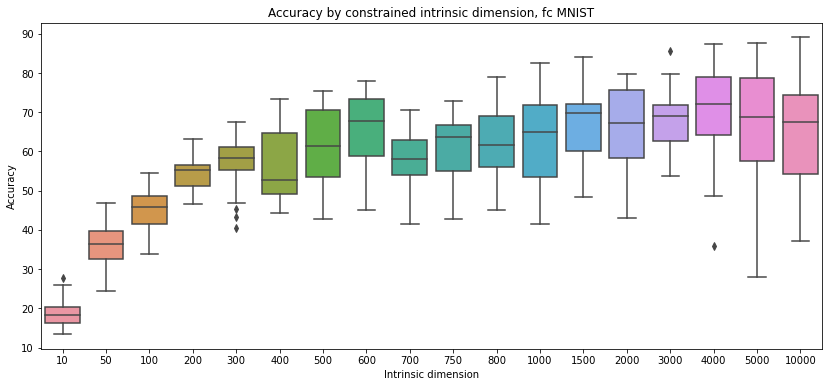

In [13]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=tidydf, x="num_id", y="acc")
plt.xlabel("Intrinsic dimension")
plt.ylabel("Accuracy")
plt.title("Accuracy by constrained intrinsic dimension, fc MNIST")
plt.show()

This image looks pretty similar to what I had before hmm. It is what it is I guess. Next is the Conv2D version.